### Quick test to check whether if random sized samples affect differences in the clustering
We compute a random clustering, and check if our tests find significant things in comparing more and more smaller partitions of the data.

Need to delve more into this. Need to link more resources and possible things to take into account.

In [42]:
from scipy.stats import norm, ttest_ind, f_oneway, mannwhitneyu
import numpy as np
# Create a normal distribution
n = 1000
# Different sizes of clusters
pvalues = np.zeros((3, 100))
div_size = np.linspace(1,0.0001,num=100)
i = 0
for d in div_size:
    r1 = norm.rvs(size=int(n))
    r2 = norm.rvs(size=int(n*d))
    
    # Create the labels
    # cl = np.random.choice([0, 1], 1000, p=[d, 1-d])
    
    # t-test
    s1, p1 = ttest_ind(r1, r2)
    pvalues[0,i] = p1

    # Test one way anova
    # s2, p2 = f_oneway(r1, r2)
    # pvalues[1,i] = p2
    
    # Test wilcoxon test
    s3, p3 = mannwhitneyu(r1, r2, alternative = "two-sided")
    pvalues[2,i] = p3
    
    i = i + 1


/home/gerard/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:4897: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


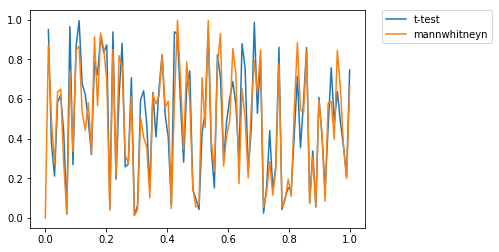

In [44]:
# Draw figure
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.plot(div_size, pvalues[0], label='t-test')
plt.plot(div_size, pvalues[2], label='mannwhitneyn')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()